In [36]:
import numpy as np
import pandas as pd

# for drawing dendogram
import scipy.cluster.hierarchy as ch
from scipy.spatial.distance import cdist

# for creating a model
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import matplotlib.pyplot as plt

In [37]:
!cd

c:\Users\cph076408\OneDrive - Kobenhavns Lufthavne A S\Dokumenter\Code\BI-Repo\MP4


In [38]:
#Load data
data = pd.read_csv(r'C:\Users\cph076408\OneDrive - Københavns Lufthavne A S\Dokumenter\Code\BI-Repo\MP4\Attrition.csv')
print(data)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [39]:
data.shape

(1470, 35)

In [40]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
data.drop(['Over18', 'OverTime', 'BusinessTravel', 'Department', 'MaritalStatus', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'TrainingTimesLastYear', 'YearsWithCurrManager'  ], axis=1, inplace=True)

In [42]:
X = data.iloc[:, 2:5].values
X

array([[1102,    2,   94],
       [ 279,    3,   61],
       [1373,    4,   92],
       ...,
       [ 155,    2,   87],
       [1023,    4,   63],
       [ 628,    2,   82]], dtype=int64)

In [43]:
data.sample(5)


,Age,Attrition,DailyRate,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
886,30,No,1465,4,63,2,3579,9369,21,1,80,1,12,3,11,9,5
1213,23,Yes,427,3,99,4,2275,25103,21,2,80,1,3,3,3,2,0
797,26,Yes,1330,1,37,3,2377,19373,20,3,80,1,1,2,1,1,0
807,38,No,770,3,73,3,8740,5569,14,2,80,2,9,3,8,7,2
275,37,No,728,1,80,4,13603,11677,18,1,80,2,15,3,5,2,0


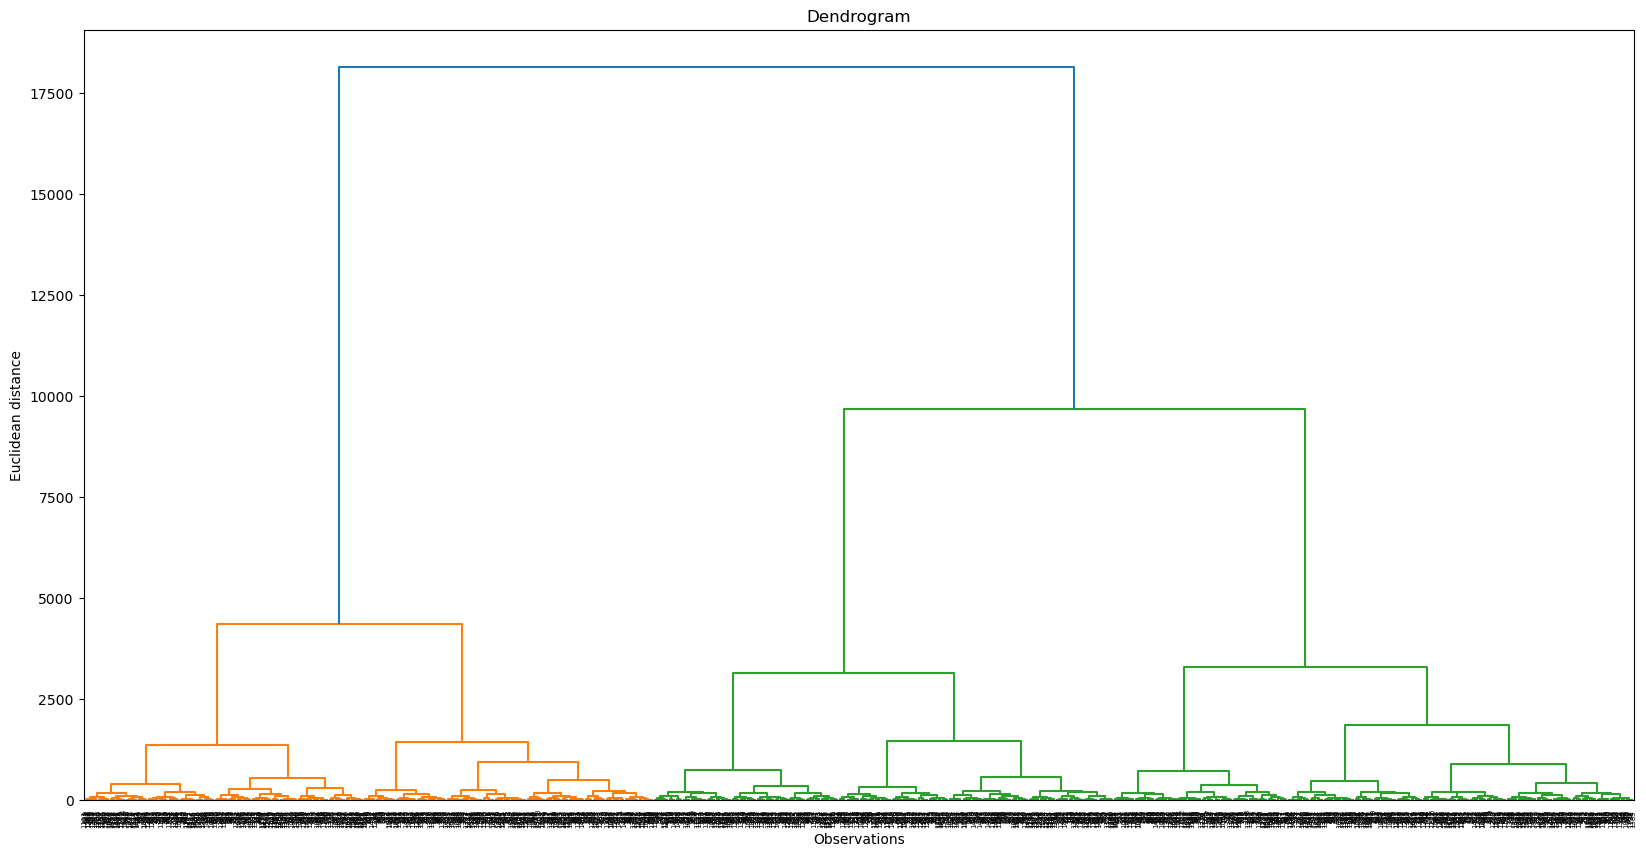

In [44]:
plt.figure(figsize=(20, 10))

dendogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

In [45]:
n_clusters = 3
model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
model.fit(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [46]:
X

array([[1102,    2,   94],
       [ 279,    3,   61],
       [1373,    4,   92],
       ...,
       [ 155,    2,   87],
       [1023,    4,   63],
       [ 628,    2,   82]], dtype=int64)

In [47]:
Y = model.fit_predict(X)
Y

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, ..., 0, 2, 2], dtype=int64)

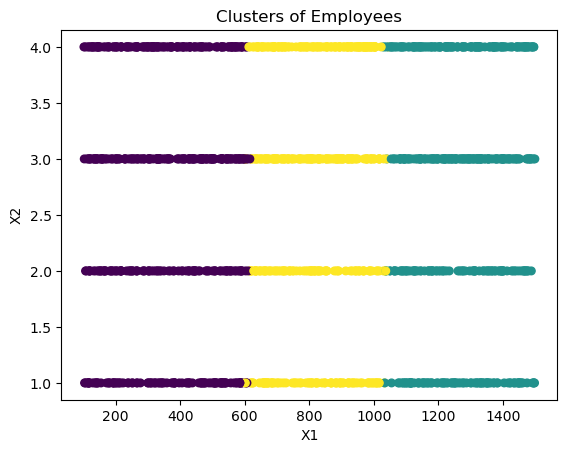

In [48]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap='viridis')
plt.title('Clusters of Employees')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [49]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

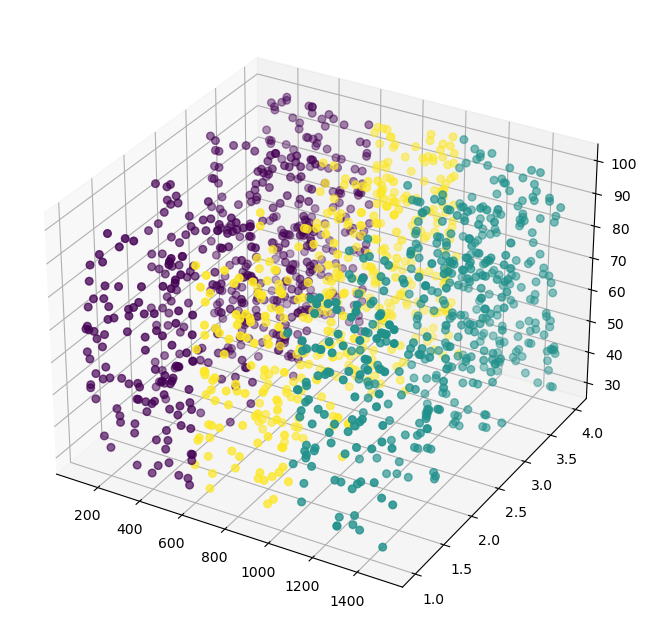

In [50]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', s=30, c=Y, cmap='viridis')

plt.show()